# Logistic regression

### Design matrix
Start with one predictor: stimulus

In [1]:
"""
IMPORTS
"""
import numpy as np
import numpy.random as npr
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

# --Get my functions
functions_path = "../../Functions/"
os.chdir(functions_path)
from one_functions_generic import get_trials, performance_metrics, bin_frac, prepro

npr.seed(65)

/opt/anaconda3/envs/iblenv/lib/python3.9/site-packages/one/webclient.py:127: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


In [4]:
"""
Load data
"""
trials_dir = '/home/ines/repositories/representation_learning_variability/DATA/'
trials_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/'
all_trials = pd.read_csv(trials_dir + "learning_private_one.csv")  

From all data, focus on an example session of an example mouse 
Total of 530 trials should be enough for a sigmoid fit

In [16]:
mouse_example = all_trials.loc[(all_trials['subject_nickname']=='NYU-14') & (all_trials['training_day']==33) ]

In [17]:
mouse_example = prepro(mouse_example)

/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/Users/ineslaranjeira/Documents/Repositories/representation_

Functions

In [183]:
def logistic(x, theta):
    # Logistic function (sigmoid)
    y = 1/(np.exp(-x.dot(theta))+1)
    return y


def initialize(dim, intercept=False):
    # Initialize theta array and bias 
    #b=random.random()
    #theta=np.random.rand(dim)
    if intercept == True:
        theta = np.random.randn(dim+1, 1) # adds one for the bias
    else:
        theta = np.random.randn(dim, 1)
    return theta


def loglikelihood(y, x, theta):
    ll = np.sum(y * np.log(logistic(x, theta)) + (1-y)* np.log(1-logistic(x, theta)))
    return ll


def gradient(x, y, theta_vector):
    # Computed gradient for Bernoulli distribution
    sigma = logistic(x, theta_vector)
    n = len(y)
    grad = (np.sum(sigma - y) * x )/ n
    grad = x *(sigma - y)
    grad = 2/n * x.T.dot(sigma - y)
    return grad
    
    
def gradient_descent(theta_dim, alpha, x, y, n_iter=50, tolerance=1e-06):
    # the algorithm will simultaneously update the theta values 
    # after each model fits to find the global minimum of our cost function.
    theta_vector = initialize(theta_dim, intercept=False)
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    thetas = []
    X_vector = np.c_[np.ones((len(x), 1)), x]  # Add intercept term to x
    X_vector = np.c_[x]  # no intercept term
    for i in range(n_iter):
        gradients = 1/len(y) * X_vector.T.dot(logistic(X_vector, theta_vector) - y_new)
        # Update theta
        theta_vector = theta_vector - alpha * gradients
        # Make predictions based on updated thetas
        y_pred = logistic(X_vector, theta_vector)
        
        #Calculate the loss for each training instance
        cost_value = - np.sum(np.dot(y_new.T, np.log(y_pred))+ 
                                   np.dot((1 - y_new).T, np.log(1 - y_pred))) / (len(y_pred))
        cost_lst.append(cost_value)
        thetas.append(theta_vector)
        # Decide when to stop and plot progress
        diff = -alpha * gradients
        if np.all(np.abs(diff) <= tolerance):
            plt.plot(np.arange(1, n_iter),cost_lst[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            break

    return theta_vector, cost_lst, thetas

In [167]:
theta_dim = 1
alpha = 0.01
n_iter=100000
tolerance=1e-06

In [168]:
X_vector.T.dot(logistic(X_vector, theta_vector) - y_new)

array([[36.19778622]])

In [184]:
    # the algorithm will simultaneously update the theta values 
    # after each model fits to find the global minimum of our cost function.
    theta_vector = initialize(theta_dim, intercept=False)
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    thetas = []
    X_vector = np.c_[x]  # Add intercept term to x
    for i in range(n_iter):
        gradients = 1/len(y) * X_vector.T.dot(logistic(X_vector, theta_vector) - y_new)
        # Update theta
        theta_vector = theta_vector - alpha * gradients
        # Make predictions based on updated thetas
        y_pred = logistic(X_vector, theta_vector)
        
        #Calculate the loss for each training instance
        cost_value = - np.sum(np.dot(y_new.T, np.log(y_pred))+ 
                                   np.dot((1 - y_new).T, np.log(1 - y_pred))) / (len(y_pred))
        cost_lst.append(cost_value)
        thetas.append(theta_vector)
        # Decide when to stop and plot progress
        diff = -alpha * gradients
        if np.all(np.abs(diff) <= tolerance):
            plt.plot(np.arange(1, n_iter),cost_lst[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            break


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_45693/3335285470.py:17: RuntimeWarning: divide by zero encountered in log
  np.dot((1 - y_new).T, np.log(1 - y_pred))) / (len(y_pred))


In [117]:
new_thetas = np.reshape(thetas, (10000, 2))

In [192]:
n_iter = 1000
x = np.array(mouse_example['signed_contrast'])
y = np.array(mouse_example['choice'])
theta_learned, cost_lst, thetas = gradient_descent(1, 0.01, x, y, n_iter, tolerance=1e-06)

Text(0, 0.5, 'Cost')

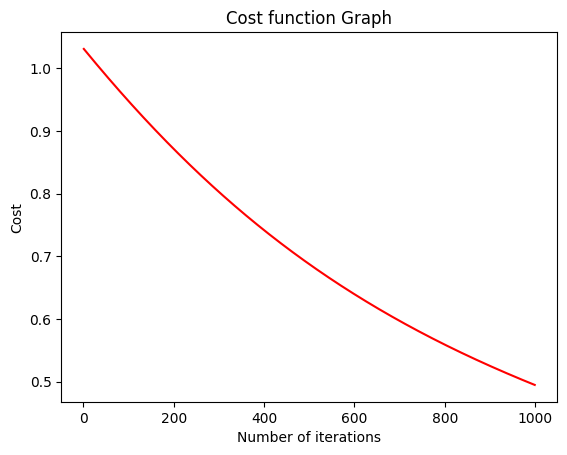

In [193]:
            plt.plot(np.arange(1, n_iter),cost_lst[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')